In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

In [7]:
print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [9]:
print(df.describe())

         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           

In [10]:
print(df.isnull().sum())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


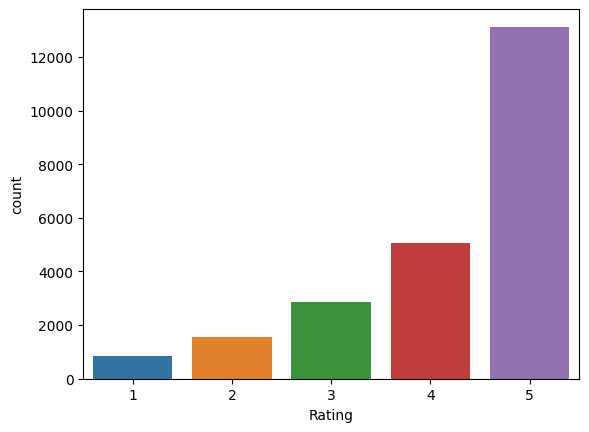

In [11]:
sns.countplot(x='Rating', data=df)
plt.show()

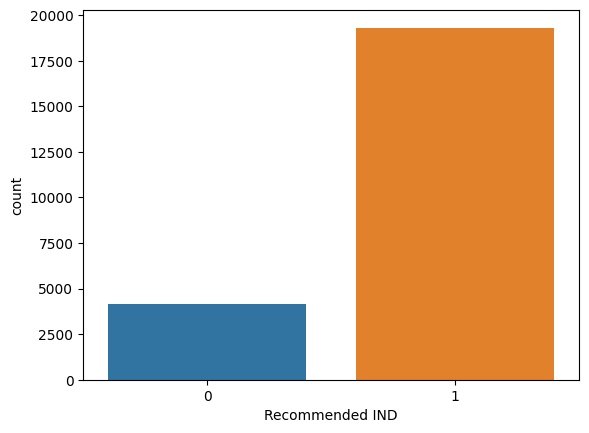

In [12]:
sns.countplot(x='Recommended IND', data=df)
plt.show()

In [20]:
# Drop rows with missing review text
df = df.dropna(subset=['Review Text','Division Name']) 

In [15]:
# Replace missing titles with an empty string
df['Title'].fillna('Unknown', inplace=True)  

In [23]:
df = df.drop(columns=['Clothing ID'])

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Title                    22628 non-null  object
 3   Review Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended IND          22628 non-null  int64 
 6   Positive Feedback Count  22628 non-null  int64 
 7   Division Name            22628 non-null  object
 8   Department Name          22628 non-null  object
 9   Class Name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB
None


# Feature Enginnering

In [26]:
# Convert categorical variables into numerical values.
le = LabelEncoder()
df['Division Name'] = le.fit_transform(df['Division Name'])
df['Department Name'] = le.fit_transform(df['Department Name'])
df['Class Name'] = le.fit_transform(df['Class Name'])

In [28]:
#  Convert the Review Text into numerical features using TF-IDF 
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
df_tfidf = tfidf.fit_transform(df['Review Text'])

In [29]:
# classify reviews as positive or negative based on the rating.
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)  # Positive if rating > 3
X = df_tfidf
y = df['Sentiment']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy =  0.8680954485196641
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1033
           1       0.88      0.95      0.92      3493

    accuracy                           0.87      4526
   macro avg       0.84      0.76      0.79      4526
weighted avg       0.86      0.87      0.86      4526



In [45]:
print("AUC-ROC = ", roc_auc_score(y_test, y_pred))

AUC-ROC =  0.764895438782419


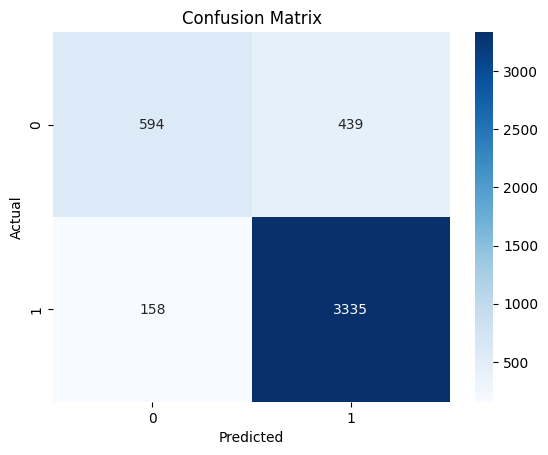

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()